In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width',1000)

In [2]:
aba=pd.read_csv('abalone.csv')
aba.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
aba.shape

(4177, 9)

In [4]:
aba.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
aba.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Univariate Analysis

In [9]:
aba.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
sorted(aba.Rings.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29]

In [7]:
aba.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

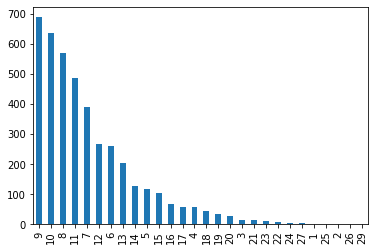

In [8]:
aba.Rings.value_counts().plot.bar()

In [11]:
aba.Sex.value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

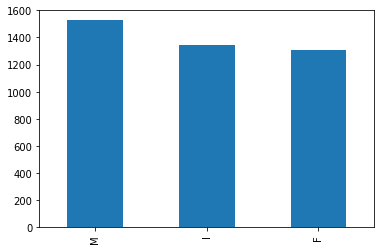

In [12]:
aba.Sex.value_counts().plot.bar()

In [13]:
aba.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


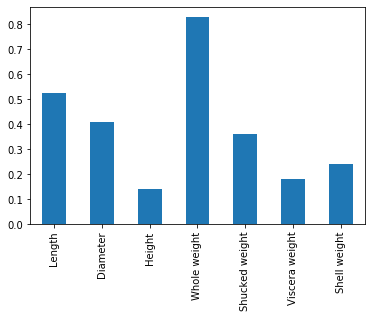

In [14]:
aba.describe().iloc[1,0:-1].plot.bar()

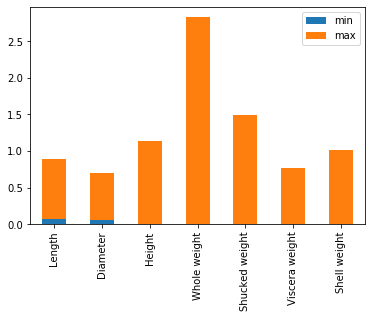

In [19]:
aba.describe().drop('Rings', axis=1).loc[['min','max']].T.plot.bar(stacked=True)

In [20]:
# variable transformation in order to make distplot and boxplot

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
aba['Sex']=le.fit_transform(aba['Sex'])
aba['Sex'].head(7)

0    2
1    2
2    0
3    2
4    1
5    1
6    0
Name: Sex, dtype: int32

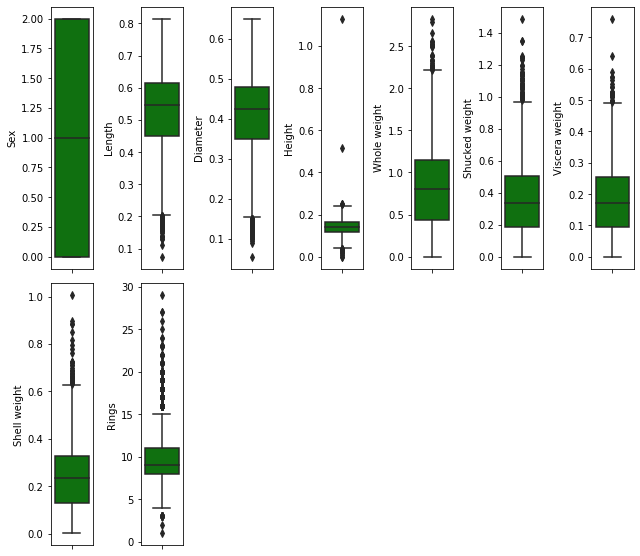

In [22]:
col=aba.columns.values
plt.figure(figsize=(9,27))
for i in range(len(col)):
    plt.subplot(7,7,i+1)
    sns.boxplot(aba[col[i]], color='green', orient='v')
    plt.tight_layout()

In [23]:
# there are outliers in length, dia, height, whole weight, shucked weight, viscera weight, shell weight, rings 

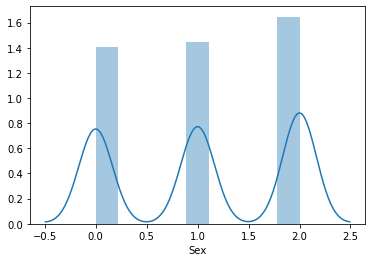

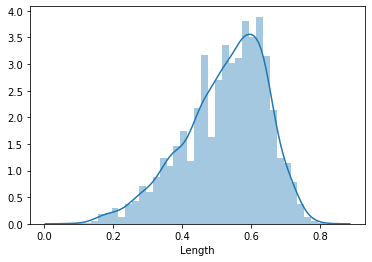

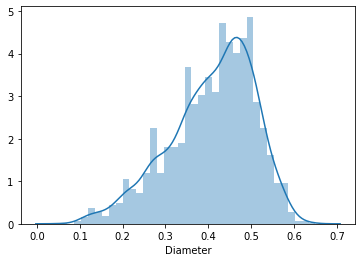

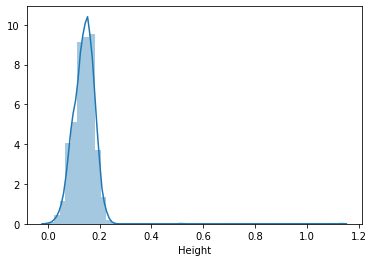

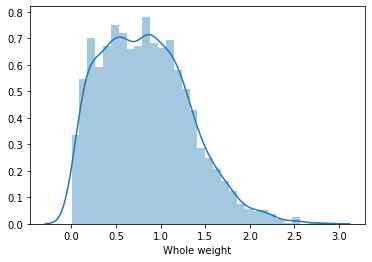

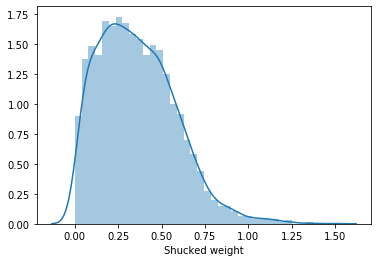

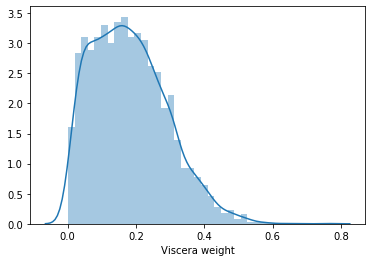

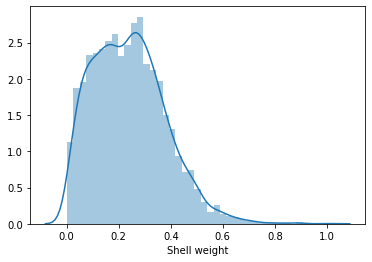

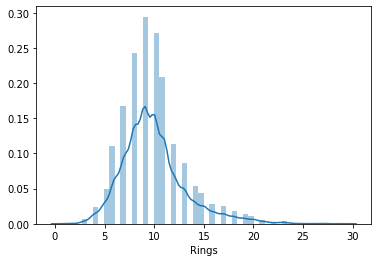

In [24]:
for i in col:
    plt.subplots()
    sns.distplot(aba[i])
    plt.xlabel(i)

In [25]:
# checking skewness manually
aba.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

# Bivariate Analysis

In [32]:
aba.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [26]:
aba.groupby('Sex').mean()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,,,,,,,,
0,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,11.129304
1,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,7.890462
2,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,10.705497


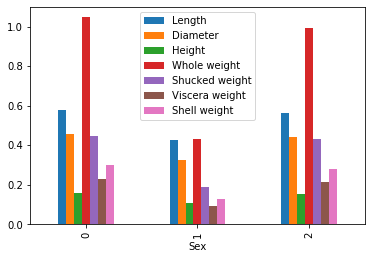

In [27]:
aba.groupby('Sex').mean().iloc[:,0:-1].plot.bar()

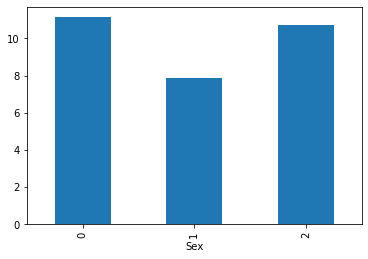

In [28]:
aba.groupby('Sex').mean().iloc[:,-1].plot.bar()

In [51]:
aba.groupby('Sex').describe()

Length                                                          Diameter                                                         Height                                                       Whole weight                                                                 Shucked weight                                                                Viscera weight                                                                Shell weight                                                              Rings                                                 
      count      mean       std    min      25%    50%    75%    max    count      mean       std    min    25%    50%    75%    max   count      mean       std    min    25%    50%    75%   max        count      mean       std     min      25%      50%       75%     max          count      mean       std     min       25%    50%       75%     max          count      mean       std     min     25%      50%       75%     max        count      mean       std    min    25%     50%       75%    max   count       mean       std  min  25%   50%   75%   max
Sex                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
0    1249.0  0.575388  0.084217  0.275  0.52000  0.585  0.635  0.755   1249.0  0.451641  0.069287  0.195  0.405  0.460  0.500  0.600  1249.0  0.155649  0.028659  0.015  0.135  0.155  0.175  0.25       1249.0  1.018320  0.400298  0.0800  0.71450  1.01700  1.291500  2.2260         1249.0  0.436273  0.185778  0.0310  0.293500  0.437  0.560500  1.0135         1249.0  0.225748  0.092666  0.0210  0.1575  0.22100  0.293000  0.4925       1249.0  0.291813  0.112653  0.025  0.210  0.2900  0.364000  0.625  1249.0  10.830264  2.607622  5.0  9.0  10.0  12.0  19.0
1    1322.0  0.430794  0.105108  0.165  0.36000  0.440  0.510  0.725   1322.0  0.328854  0.085321  0.115  0.270  0.335  0.395  0.550  1322.0  0.108911  0.030695  0.015  0.090  0.110  0.130  0.22       1322.0  0.435098  0.283660  0.0145  0.21375  0.38875  0.600875  2.0495         1322.0  0.192840  0.127532  0.0055  0.092125  0.171  0.270875  0.7735         1322.0  0.092846  0.062106  0.0005  0.0440  0.08150  0.130375  0.4405       1322.0  0.129123  0.084054  0.005  0.065  0.1135  0.178875  0.655  1322.0   7.913767  2.411518  3.0  6.0   8.0   9.0  19.0
2    1456.0  0.556212  0.099438  0.165  0.50375  0.575  0.625  0.760   1456.0  0.434959  0.081784  0.125  0.390  0.450  0.490  0.605  1456.0  0.149279  0.032245  0.040  0.130  0.150  0.170  0.24       1456.0  0.951794  0.424756  0.0230  0.65500  0.95325  1.229000  2.2385         1456.0  0.416196  0.200752  0.0085  0.272000  0.413  0.552625  1.0170         1456.0  0.208047  0.096193  0.0045  0.1435  0.20625  0.271625  0.4915       1456.0  0.270438  0.117606  0.005  0.185  0.2725  0.345125  0.646  1456.0  10.459478  2.650761  3.0  9.0  10.0  12.0  19.0

In [33]:
aba.groupby('Rings').mean()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,,
1,1.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500
2,1.000000,0.150000,0.100000,0.025000,0.015000,0.004500,0.004000,0.005000
3,1.200000,0.176000,0.128667,0.041667,0.028400,0.011767,0.006267,0.008933
4,1.105263,0.221491,0.161579,0.053947,0.059605,0.024719,0.012956,0.018000
5,1.060870,0.285739,0.210696,0.069913,0.125500,0.061696,0.027330,0.036770
6,1.042471,0.369363,0.278861,0.091776,0.273174,0.123158,0.058371,0.078388
7,1.092072,0.422033,0.321535,0.105921,0.397386,0.182657,0.085899,0.111648
8,1.088028,0.498776,0.384798,0.128556,0.640753,0.293773,0.138502,0.178609
9,1.058055,0.546865,0.425218,0.142721,0.852013,0.387938,0.187803,0.236509


In [29]:
pd.crosstab(aba['Sex'], aba['Rings'])

Rings,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29
Sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,4,16,44,122,238,248,200,128,88,56,41,30,26,19,15,12,7,3,6,1,1,0,1,1
1,1,1,12,51,100,216,267,274,173,92,62,21,24,14,10,7,7,5,2,2,1,0,0,0,0,0,0,0
2,0,0,3,6,11,27,80,172,278,294,225,118,91,56,52,30,25,18,15,12,6,3,3,1,0,1,1,0


<Figure size 1800x1080 with 0 Axes>

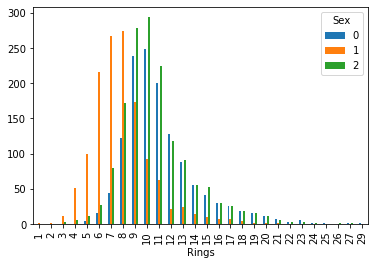

In [31]:
plt.figure(figsize=(25,15))
pd.crosstab(aba['Rings'],aba['Sex']).plot.bar()

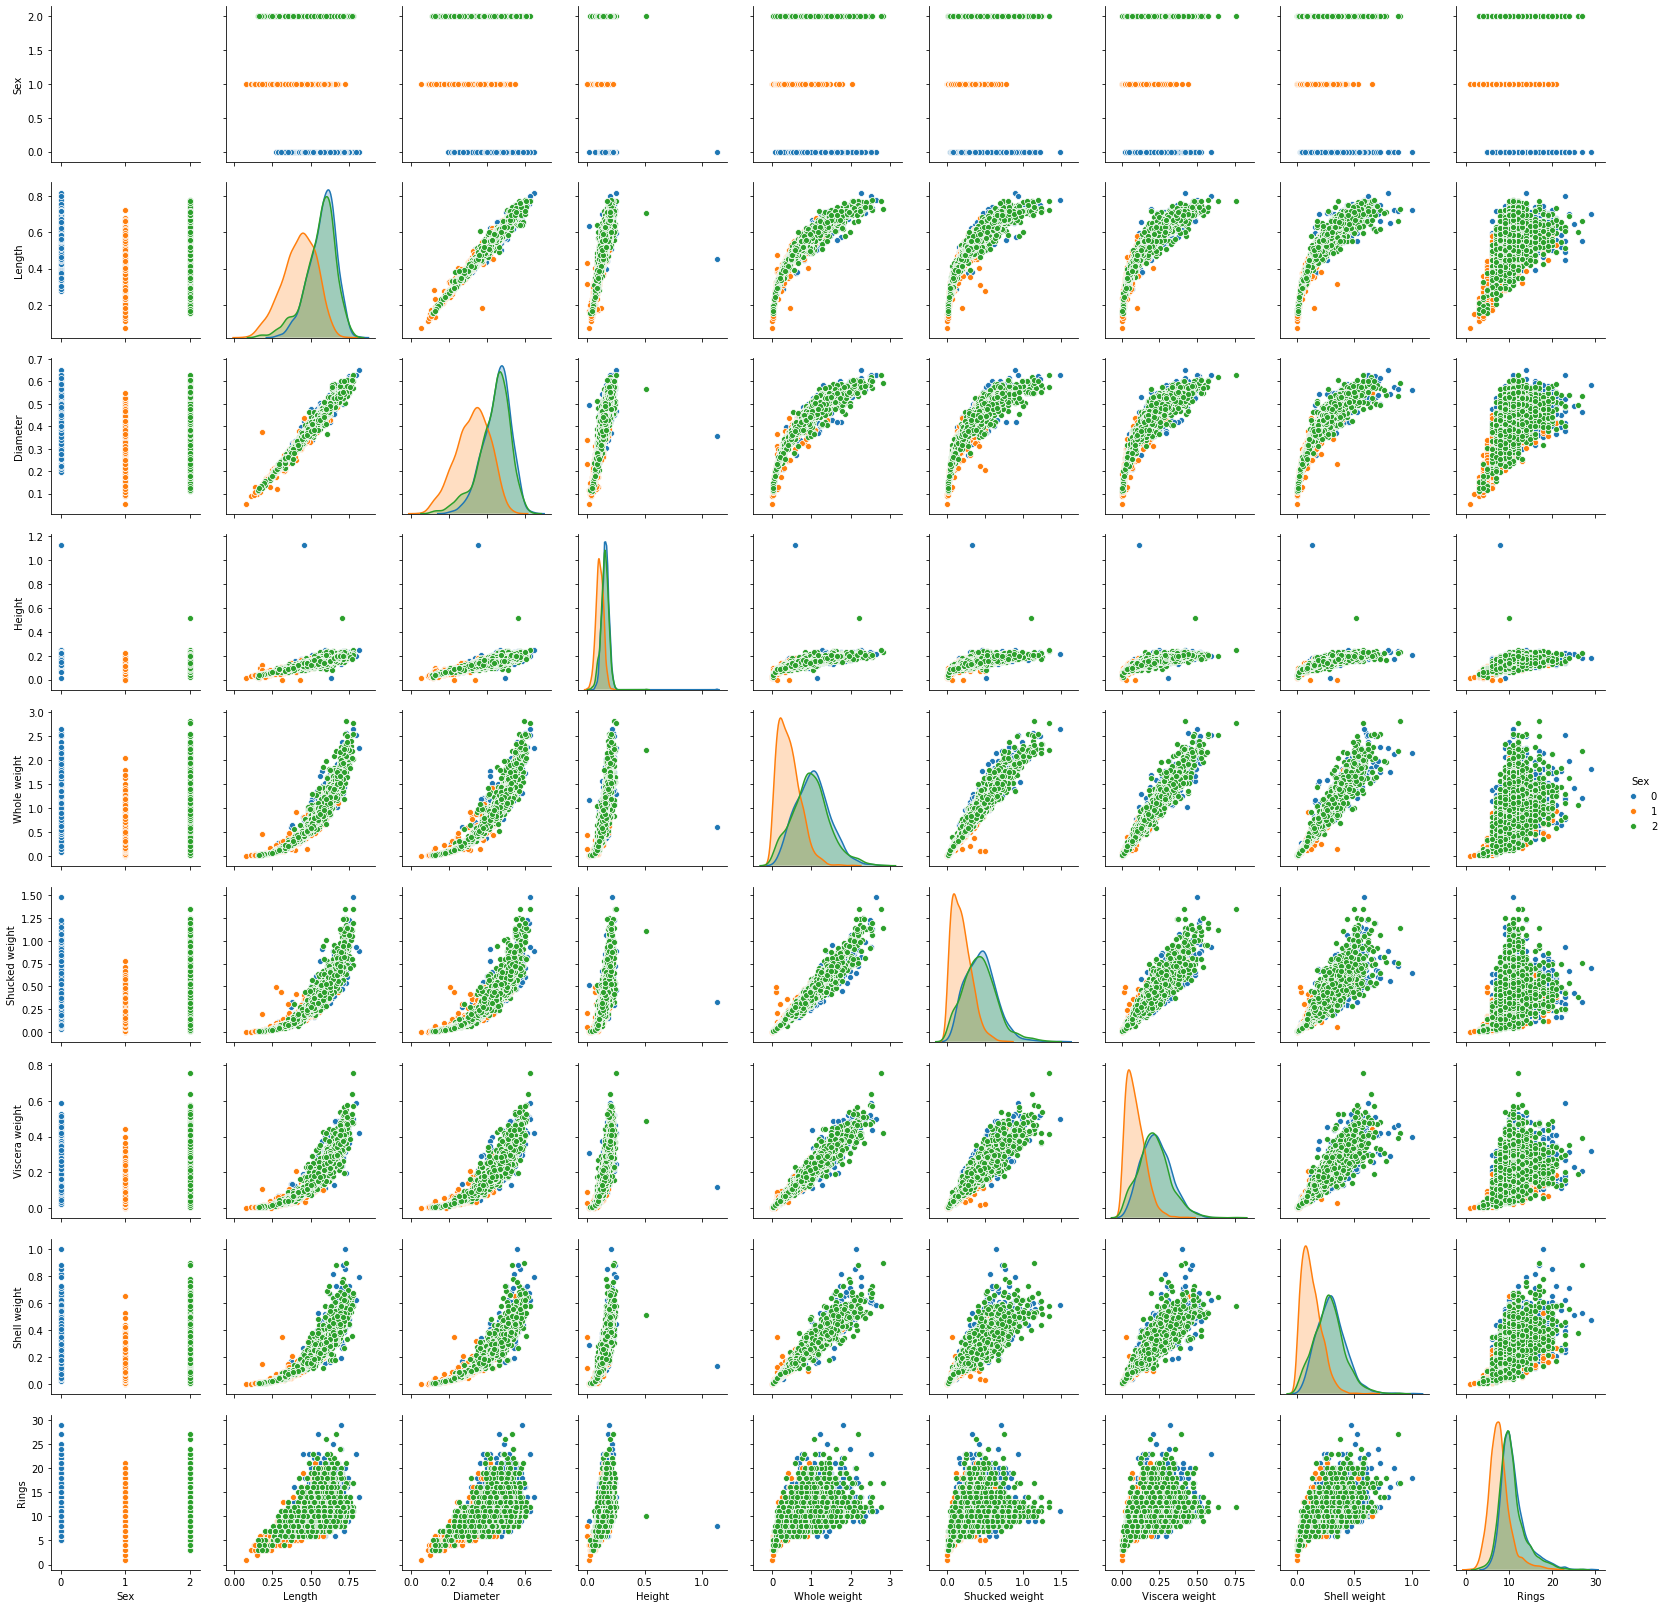

In [34]:
sns.pairplot(aba, hue='Sex')

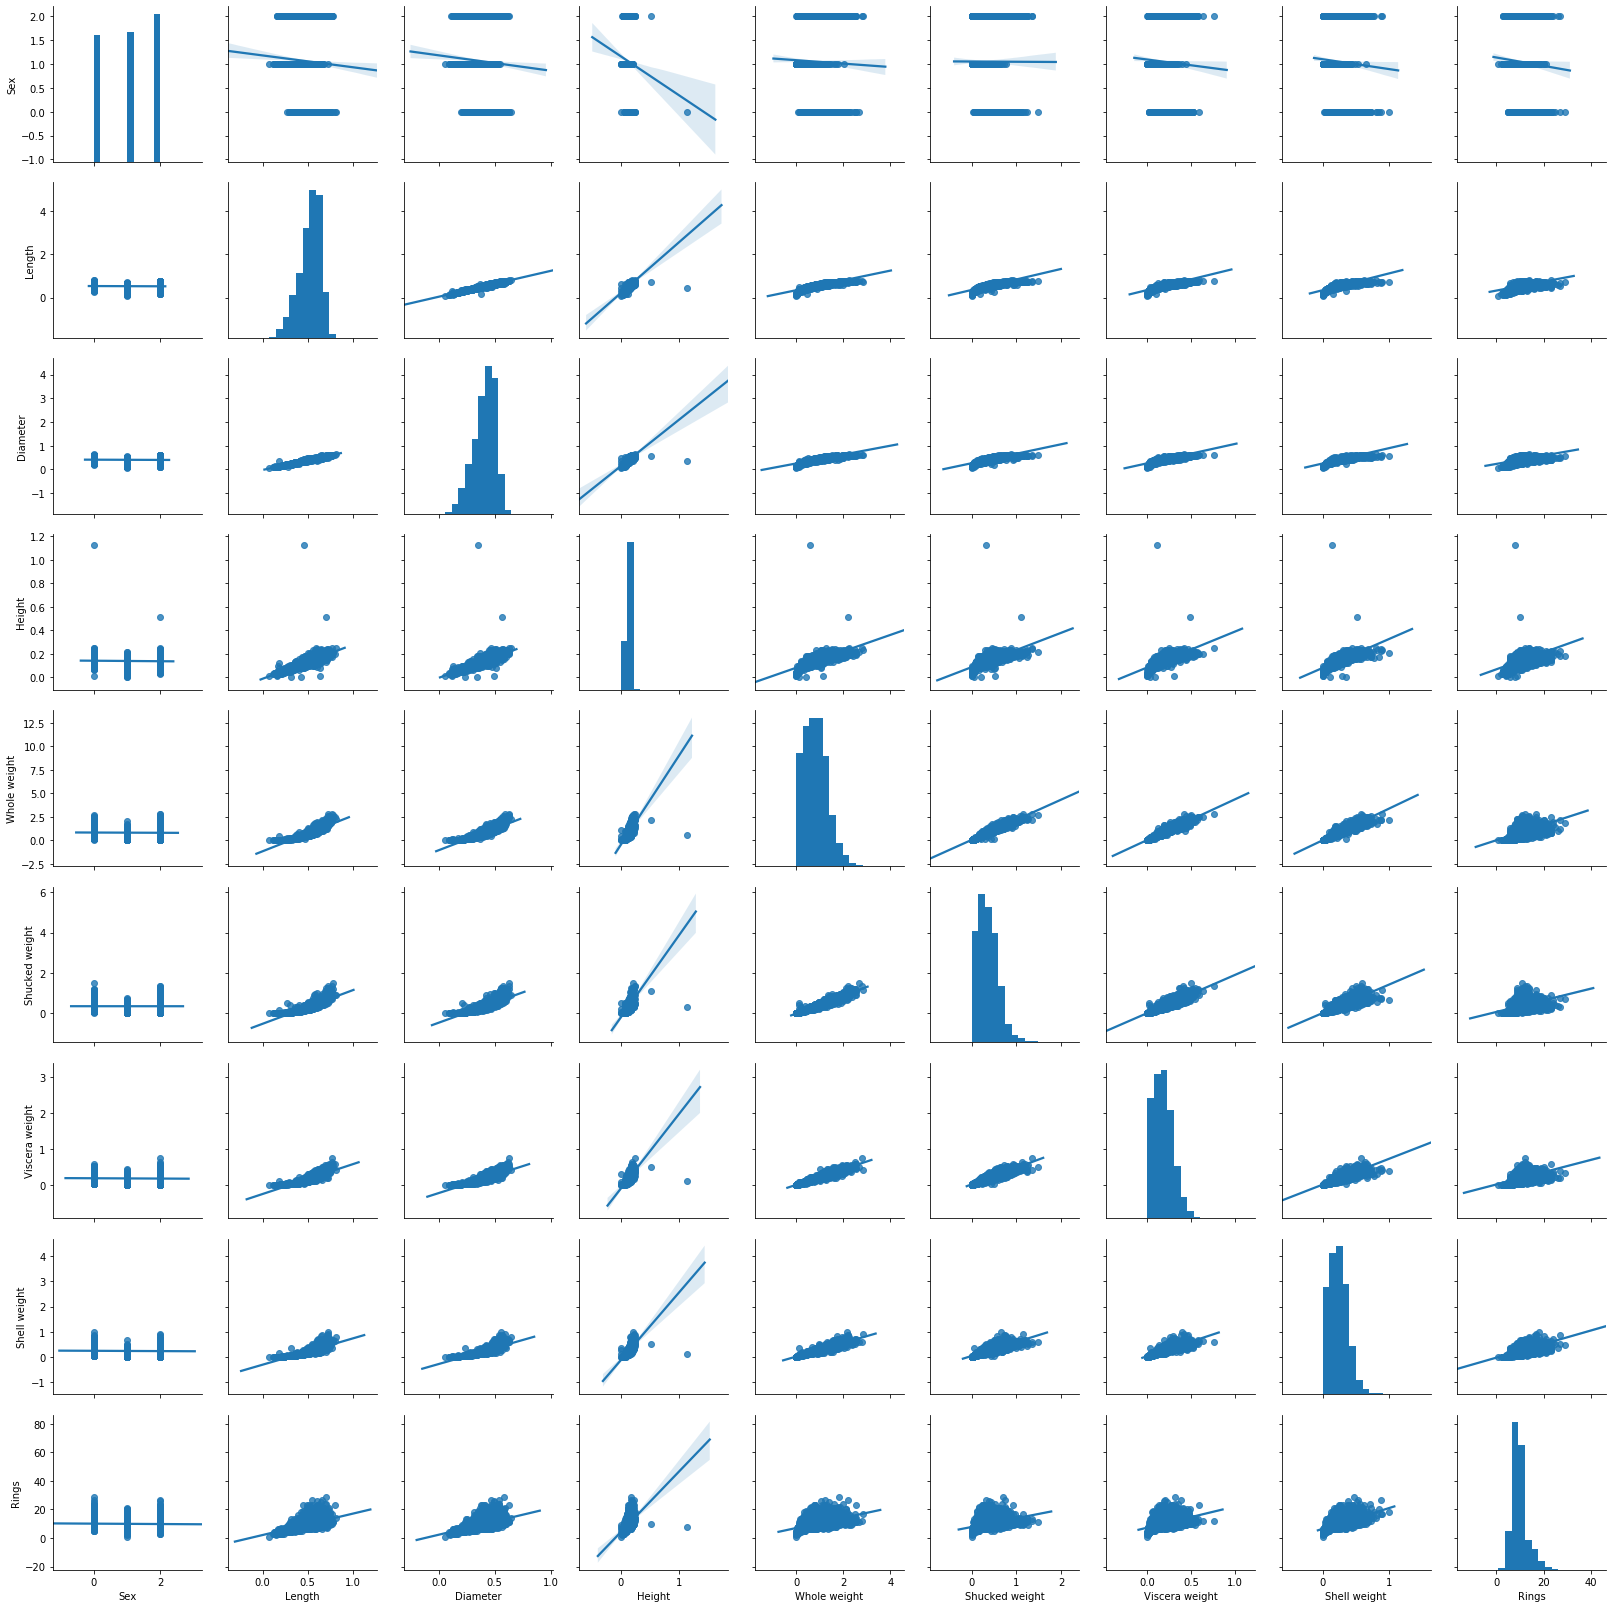

In [35]:
sns.pairplot(aba, kind='reg')

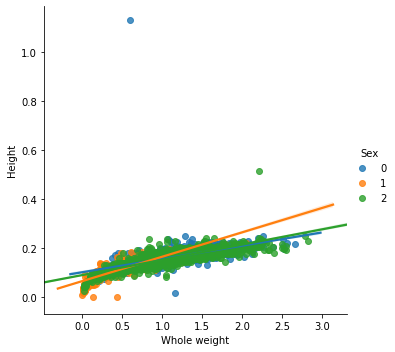

In [36]:
sns.lmplot(data=aba, x='Whole weight', y='Height', hue='Sex')

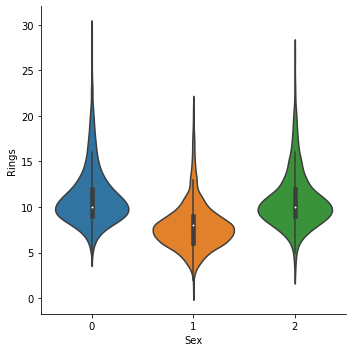

In [37]:
sns.catplot(data=aba, x='Sex', y='Rings', kind='violin')

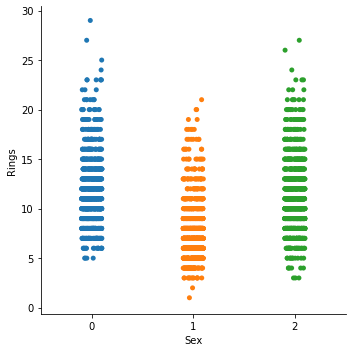

In [38]:
sns.catplot(data=aba, x='Sex', y='Rings', kind='strip')

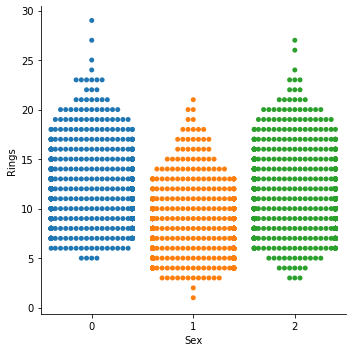

In [39]:
sns.catplot(data=aba, x='Sex', y='Rings', kind='swarm')

In [40]:
aba.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

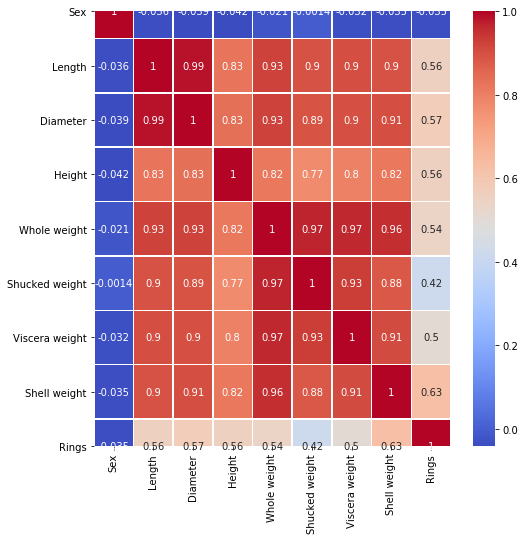

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(aba.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

In [43]:
corr_matrix=aba.corr().abs()

In [44]:
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
upper

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,NaN,0.036066,0.038874,0.042077,0.021391,0.001373,0.032067,0.034854,0.034627
Length,NaN,NaN,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,NaN,NaN,NaN,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,NaN,NaN,NaN,NaN,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,NaN,NaN,NaN,NaN,NaN,0.969405,0.966375,0.955355,0.540390
Shucked weight,NaN,NaN,NaN,NaN,NaN,NaN,0.931961,0.882617,0.420884
Viscera weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.907656,0.503819
Shell weight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.627574
Rings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Outliers

In [45]:
from scipy.stats import zscore

In [46]:
z=np.abs(zscore(aba))

In [47]:
np.where(z>3)

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
         166,  167,  168,  170,  181,  232,  236,  236,  236,  237,  237,
         238,  238,  239,  270,  275,  277,  278,  294,  310,  313,  314,
         334,  351,  355,  358,  358,  362,  375,  416,  417,  428,  431,
         433,  469,  478,  480,  501,  526,  526,  530,  572,  628,  673,
         674,  675,  678,  694,  696,  696,  719,  719,  720,  720,  744,
         754,  756,  811,  891,  891,  891, 1048, 1051, 1051, 1052, 1193,
        1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207, 1207, 1207, 1209,
        1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427, 1427, 1427, 1428,
        1429, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762, 1762, 1762,
        1763, 1763, 1763, 1821, 1982, 1986, 1987, 1987, 2051, 2090, 2108,
        2108, 2114, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209,
        2274, 2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2381,
        2436, 2459, 2471, 2544, 2623, 

In [48]:
len(np.where(z>3)[0])

200

In [49]:
# so there are 200 outliers in the data

In [50]:
# now, outliers removal
aba=aba[(z<3).all(axis=1)]
aba.shape

(4027, 9)

# Model Building

In [227]:
# this is a regression problem
# The target variable is no of rings
# there are 29 categories in the ring types

In [228]:
# there are some necessary transformations that need to be done
# we'll make a copy of the orogonal dataset

In [229]:
abat=aba.copy()

In [230]:
abat['Age']=abat['Rings']+1.5

In [231]:
abat.drop('Rings', axis=1, inplace=True)

In [232]:
# let's deal with the skewness first

In [233]:
abat.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Age               0.725464
dtype: float64

In [234]:
from scipy.stats import boxcox

In [235]:
# abat.Length.value_counts()
# the length column is having very small values, due to which log transformation would give NaN values
abat['Length']=np.power(abat['Length'],2)

In [236]:
# abat.Diameter.value_counts()
# the Diameter column is having very small values, due to which log transformation would give NaN values
abat['Diameter']=np.power(abat['Diameter'],2)

In [237]:
# np.sqrt(abat['Rings']).skew()

In [448]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [239]:
def std_scale(x):
    from sklearn.preprocessing import StandardScaler
    scx=StandardScaler()
    x=pd.DataFrame(scx.fit_transform(x),columns=x.columns.values)
    return x

In [252]:
def get_best(m,x,y):
    r_state=0
    max_score=0
    for i in range(1,70):
        x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=i)
        m.fit(x_train,y_train)
        pred=m.predict(x_test)
        score=m.score(x_test,y_test)
        if max_score < score:
            max_score=score
            r_state=i
    return r_state,max_score

In [463]:
def fit(m,x,y,rs):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)

In [253]:
def get_score(m,x,y,rs):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=m.score(x_test,y_test)
    return train_score,test_score,pred

In [449]:
def get_pred(m,x,y,rs):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    return pred

In [450]:
def get_metrics(m,x,y,rs):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    return mse

In [242]:
# Now, let's check the scores of each model and get an idea of which one is the best

In [243]:
lr=LinearRegression()
dt_gini=DecisionTreeRegressor()
svc_poly=SVR(kernel='poly')
svc_rbf=SVR(kernel='rbf')
knn=KNeighborsRegressor()

In [244]:
# Model 1---> No standard scaling from data set

In [254]:
aba1=abat.copy()

In [255]:
x1=aba1.iloc[:,:-1]
y1=aba1.iloc[:,-1]

In [256]:
get_best(dt_gini,x1,y1)

(25, 0.23856815634122522)

In [257]:
get_best(svc_poly,x1,y1)

(31, 0.23919393422541146)

In [258]:
get_best(svc_rbf,x1,y1)

(31, 0.4723842395034049)

In [259]:
get_best(knn,x1,y1)

(31, 0.5405369252035769)

In [260]:
get_best(lr,x1,y1)

(62, 0.5317676789049579)

In [261]:
# only lr, knn and svc_rbf are performing good

In [262]:
# Now, we'll work only upon LR and KNN

# Linear Regression

In [263]:
lr=LinearRegression(normalize=True)

In [264]:
aba2=abat.copy()
aba2.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.207025,0.133225,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.122500,0.070225,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.280900,0.176400,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.193600,0.133225,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.108900,0.065025,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [265]:
# let's apply feature engineering
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [266]:
sfs1=sfs(lr, k_features=6, forward=False, verbose=1, cv=5)

In [267]:
x2=aba2.iloc[:,:-1]
y2=aba2.iloc[:,-1]

In [268]:
sfs1.fit(x2,y2)
feat_names=list(sfs1.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished
Features: 7/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished
Features: 6/6

['Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


In [269]:
new_x2=x2[feat_names]
new_x2.head()

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.133225,0.095,0.5140,0.2245,0.1010,0.150
1,0.070225,0.090,0.2255,0.0995,0.0485,0.070
2,0.176400,0.135,0.6770,0.2565,0.1415,0.210
3,0.133225,0.125,0.5160,0.2155,0.1140,0.155
4,0.065025,0.080,0.2050,0.0895,0.0395,0.055


In [270]:
get_score(lr,x2,y2,62)

(0.4965325762077524,
 0.5317676789049581,
 array([12.80570415, 11.83305608, 11.98427564, ..., 13.10634692,
        11.63456972, 10.16875417]))

In [271]:
# let's apply standard scaling
new_x2=std_scale(new_x2)

In [272]:
get_score(lr,new_x2,y2,62)

(0.49583118607151255,
 0.5330690000117436,
 array([12.93664301, 11.90785034, 11.91412665, ..., 13.03102877,
        11.62398877, 10.19955727]))

In [273]:
# the result has slightly improved after std scaling

In [274]:
# creating test train split
x2_train, x2_test, y2_train, y2_test=train_test_split(new_x2,y2,test_size=0.25,random_state=62)

In [275]:
lr.fit(x2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [276]:
pred=lr.predict(x2_test)
score=lr.score(x2_test,y2_test)
print(score)

0.5330690000117436


In [281]:
residuals=pd.DataFrame({'fitted values': y2_test,
                      'predicted values': pred})

In [282]:
residuals

,fitted values,predicted values
500,13.5,12.936643
3128,11.5,11.907850
2693,10.5,11.914127
293,20.5,14.947384
2028,11.5,11.515726
...,...,...
769,18.5,13.269989
4103,11.5,13.537596
3589,12.5,13.031029
1330,10.5,11.623989


In [283]:
residuals['residual']=residuals['fitted values']-residuals['predicted values']

In [284]:
# plotting residual curve

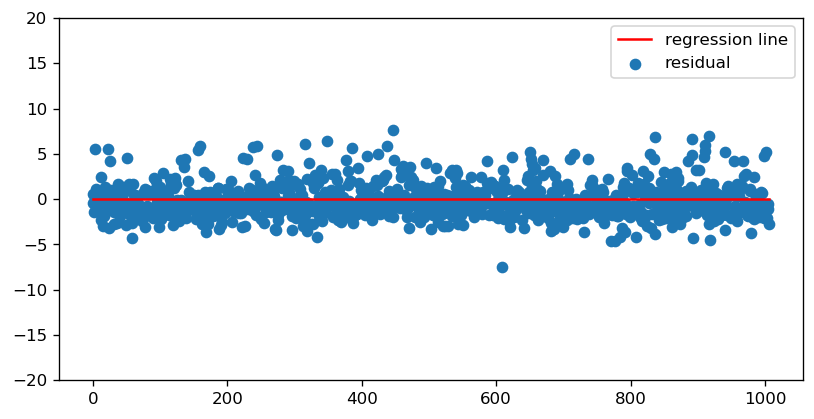

In [288]:
plt.figure(figsize=(8,4), dpi=120,facecolor='w', edgecolor='b')
f=range(0,1007)
k=[0 for i in range(1007)]
plt.scatter(f, residuals.residual[:], label='residual')
plt.plot(f,k, color='red', label='regression line')
plt.xlabel('')
plt.ylabel('')
plt.ylim(-20,20)
plt.legend()

In [291]:
# the residuals are having constant variance

In [292]:
# now, checking the distribution of errors

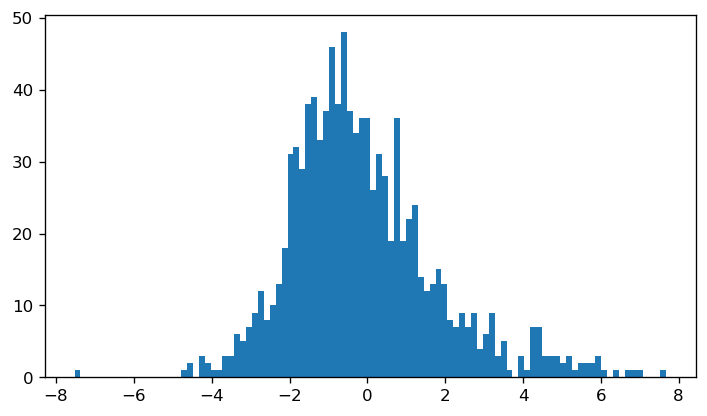

In [293]:
plt.figure(figsize=(7,4), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residual, bins=100)
plt.show()

In [294]:
# the distribution is a little right skewed

In [295]:
# checking qq plot

In [296]:
from statsmodels.graphics.gofplots import qqplot

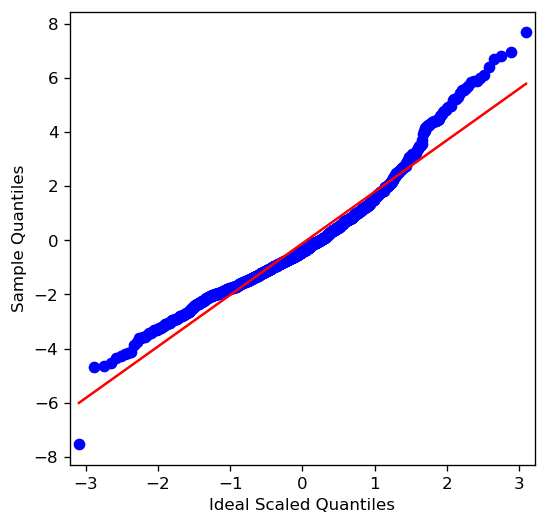

In [297]:
fig,ax=plt.subplots(figsize=(5,5), dpi=120)
qqplot(residuals.residual, line='s', ax=ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.show()

In [298]:
# checking variance inflation factor

In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [300]:
from statsmodels.tools.tools import add_constant

In [301]:
vif=pd.Series([variance_inflation_factor(aba2.values,i) for i in range(aba2.shape[1])], index=aba2.columns)
vif

Sex                 2.551829
Length            226.175920
Diameter          221.254088
Height             61.438037
Whole weight      448.601728
Shucked weight    123.885686
Viscera weight     67.357404
Shell weight       97.993817
Age                27.146983
dtype: float64

In [302]:
# Model Interpretability

<BarContainer object of 6 artists>

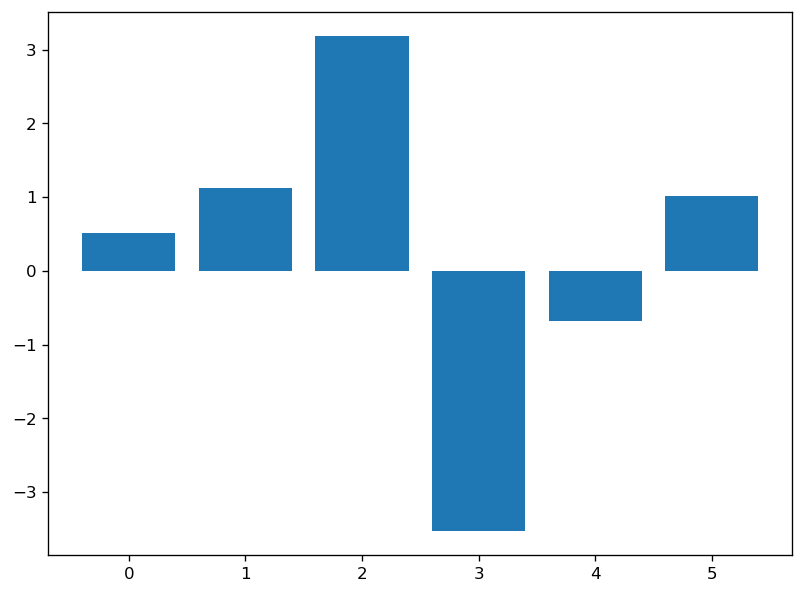

In [303]:
plt.figure(figsize=(8,6), dpi=120, facecolor='w', edgecolor='b')
x=range(len(x2_train.columns))
y=lr.coef_
plt.bar(x,y)

In [316]:
# cross validation

In [317]:
from sklearn.model_selection import cross_val_score

In [333]:
score=cross_val_score(lr,new_x2, y2, cv=7)
score.mean(), score.std()

(0.4300410926361515, 0.11769076332629257)

# Working with KNN

In [304]:
aba3=abat.copy()
aba3.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.207025,0.133225,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.122500,0.070225,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.280900,0.176400,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.193600,0.133225,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.108900,0.065025,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [305]:
x3=aba3.iloc[:,:-1]
y3=aba3.iloc[:,-1]

In [306]:
# let's first std scale the data

In [307]:
x3s=std_scale(x3)
x3s.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.159698,-0.685238,-0.550697,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659
1,1.159698,-1.429380,-1.412903,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033
2,-1.285382,-0.034857,0.040188,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629
3,1.159698,-0.803429,-0.550697,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574
4,-0.062842,-1.549112,-1.484069,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290


In [308]:
# let's normalize data and notice the diff

In [309]:
from sklearn.preprocessing import normalize

In [312]:
x3n=normalize(x3)
x3n=pd.DataFrame(x3n, columns=x3.columns.values)
x3n.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.951633,0.098506,0.063391,0.045203,0.244570,0.106821,0.048057,0.071373
1,0.988207,0.060528,0.034698,0.044469,0.111420,0.049163,0.023964,0.034587
2,0.000000,0.331854,0.208398,0.159488,0.799804,0.303028,0.167167,0.248093
3,0.951241,0.092080,0.063365,0.059453,0.245420,0.102496,0.054221,0.073721
4,0.963541,0.104930,0.062654,0.077083,0.197526,0.086237,0.038060,0.052995


In [314]:
# let's find the best params

In [315]:
knn=KNeighborsRegressor()

In [334]:
from sklearn.model_selection import GridSearchCV

In [407]:
params={'n_neighbors': range(2,70,3)}
gkb=GridSearchCV(knn,params)
gkb.fit(x3s,y3)
gkb.best_params_

{'n_neighbors': 17}

In [408]:
knn=KNeighborsRegressor(n_neighbors=17)

In [409]:
# now, apply feature engineering

In [410]:
sfs2=sfs(knn, k_features=6, forward=False, verbose=1)

In [411]:
sfs2.fit(x3s,y3)
feat_names=list(sfs2.k_feature_names_)
print(feat_names)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.8s finished
Features: 7/6[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.6s finished
Features: 6/6

['Sex', 'Length', 'Diameter', 'Whole weight', 'Shucked weight', 'Shell weight']


In [412]:
new_x3=x3s[feat_names]

In [413]:
# create train test split

In [414]:
x3_train, x3_test, y3_train, y3_test=train_test_split(new_x3,y3,test_size=0.25,random_state=31)

In [415]:
knn.fit(x3_train, y3_train)
knn_pred=knn.predict(x3_test)
score=knn.score(x3_test, y3_test)
score

0.553588118195581

In [416]:
# now, cross validation

In [417]:
score=cross_val_score(knn,new_x3, y3, cv=7)
score.mean(), score.std()

(0.4805304429387959, 0.08748778444719564)

# Lasso

In [370]:
from sklearn.linear_model import Lasso, Ridge

In [372]:
aba4=abat.copy()

In [373]:
x4=aba4.iloc[:,:-1]
y4=aba4.iloc[:,-1]

In [375]:
ls=Lasso()

In [374]:
params={'alpha':[0.001,0.01,0.1,1], 'normalize':[True, False], 'max_iter':[50,100,150,250,500,1000]}

In [376]:
gkb=GridSearchCV(ls,params)

In [377]:
gkb.fit(x4,y4)
gkb.best_params_

{'alpha': 0.001, 'max_iter': 500, 'normalize': False}

In [380]:
ls=Lasso(alpha= 0.001, max_iter= 500, normalize= False)

In [381]:
# x4_train, x4_test, y4_train, y4_test=train_test_split(x4,y4,test_size=0.25,random_state=62)

In [382]:
get_best(ls,x4,y4)

(62, 0.5324236111639119)

In [383]:
# using lasso with features used in LinReg i.e. new_x2 and y2

In [384]:
ls=Lasso()
gkb.fit(new_x2,y2)
gkb.best_params_

{'alpha': 0.001, 'max_iter': 500, 'normalize': False}

In [385]:
ls=Lasso(alpha= 0.001, max_iter= 500, normalize= False)
get_score(ls,new_x2,y2,62)

(0.4958059214873014,
 0.5326706025043058,
 array([12.92201236, 11.84315615, 11.92262441, ..., 13.03521435,
        11.62575   , 10.24154745]))

In [386]:
# there is not much improvement using lasso

In [ ]:
score=cross_val_score(ls,new_x2, y2, cv=7)
score.mean(), score.std()

# Ridge

In [387]:
rd=Ridge()

In [388]:
# using lasso with features used in LinReg i.e. new_x2 and y2
params={'alpha':[0.001,0.01,0.1,1], 'normalize':[True, False], 'max_iter':[50,100,150,250,500,1000]}
gkb=GridSearchCV(rd,params)
gkb.fit(new_x2,y2)
gkb.best_params_

{'alpha': 1, 'max_iter': 50, 'normalize': False}

In [389]:
rd=Ridge(alpha= 1, max_iter= 50, normalize= False)
get_score(rd,new_x2,y2,62)

(0.49580586419455275,
 0.5326994142346163,
 array([12.92682801, 11.84200549, 11.92630636, ..., 13.03537315,
        11.62107236, 10.24772642]))

In [390]:
# the results are almost same as that of lasso

In [391]:
# so far, the best model is knn

In [ ]:
score=cross_val_score(rd,new_x2, y2, cv=7)
score.mean(), score.std()

# Ensembling

In [394]:
from sklearn.ensemble import RandomForestRegressor

In [395]:
rf=RandomForestRegressor()

In [396]:
aba5=abat.copy()
x5=aba5.iloc[:,:-1]
y5=aba5.iloc[:,-1]
x5s=std_scale(x5)

In [397]:
params={'n_estimators':[50,100,150,200,250,500], 'max_depth':range(3,20)}
gkb=GridSearchCV(rf,params,cv=7)
gkb.fit(x5s,y5)
gkb.best_params_

{'max_depth': 9, 'n_estimators': 150}

In [398]:
rf=RandomForestRegressor(max_depth= 9, n_estimators= 150)

In [400]:
get_best(rf,x5s,y5)

(58, 0.5892455198313227)

In [401]:
rf.feature_importances_

array([0.02071357, 0.03802712, 0.04197594, 0.04137611, 0.0661892 ,
       0.15681892, 0.05192669, 0.58297245])

In [402]:
pd.Series(rf.feature_importances_, index=x5s.columns)

Sex               0.020714
Length            0.038027
Diameter          0.041976
Height            0.041376
Whole weight      0.066189
Shucked weight    0.156819
Viscera weight    0.051927
Shell weight      0.582972
dtype: float64

In [ ]:
score=cross_val_score(rf,x5s, y5, cv=7)
score.mean(), score.std()

In [403]:
# GradientBoosting

In [404]:
from sklearn.ensemble import GradientBoostingRegressor

In [405]:
gbr=GradientBoostingRegressor()

In [406]:
aba6=abat.copy()
x6=aba6.iloc[:,:-1]
y6=aba6.iloc[:,-1]
x6s=std_scale(x5)

In [419]:
params={'loss':['ls', 'lad', 'huber', 'quantile'], 'learning_rate':[0.001,0.01,0.1], 'n_estimators':[50,100,200,500]}
gkbg=GridSearchCV(gbr,params)
gkbg.fit(x6s,y6)
gkbg.best_params_

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 200}

In [420]:
gbr=GradientBoostingRegressor(learning_rate=0.1, loss='huber', n_estimators= 200)

In [421]:
get_best(gbr,x6s,y6)

(45, 0.5846532580585768)

In [422]:
get_score(gbr,x6s,y6,45)

(0.6601471105658672,
 0.5840606445163464,
 array([ 9.7873042 , 11.71891432,  6.45781706, ...,  9.04894144,
        11.03549062,  9.31012409]))

In [423]:
score=cross_val_score(gbr,x6s, y6, cv=7)
score.mean(), score.std()

(0.490408215621753, 0.09578361129513764)

In [424]:
# xgboosting

In [427]:
!pip install xgboost

In [428]:
from xgboost import XGBRegressor

In [429]:
xgbr=XGBRegressor()

In [430]:
aba7=abat.copy()
x7=aba7.iloc[:,:-1]
y7=aba7.iloc[:,-1]
x7s=std_scale(x5)

In [431]:
params={'learning_rate':[0.001,0.01,0.1], 'n_estimators':[50,100,200,500], 'random_state':range(5,60,10)}
gkbg=GridSearchCV(xgbr,params)
gkbg.fit(x7s,y7)
gkbg.best_params_

{'learning_rate': 0.01, 'n_estimators': 500, 'random_state': 5}

In [432]:
xgbr=XGBRegressor(learning_rate= 0.01, n_estimators= 500, random_state= 5)

In [433]:
get_score(xgbr, x7s,y7,5)

(0.7564937638657883,
 0.5174770670298364,
 array([11.44158 , 16.271994, 12.753655, ...,  8.801333, 13.082091,
        12.213243], dtype=float32))

In [434]:
score=cross_val_score(xgbr,x7s, y7, cv=7)
score.mean(), score.std()

(0.49731369967182276, 0.08784643914572242)

In [435]:
# Adaboosting

In [437]:
from sklearn.ensemble import AdaBoostRegressor

In [443]:
abr=AdaBoostRegressor(base_estimator=rf, learning_rate=0.01, n_estimators=150, random_state=50)

In [444]:
aba8=abat.copy()
x8=aba8.iloc[:,:-1]
y8=aba8.iloc[:,-1]
x8s=std_scale(x5)

In [445]:
get_score(abr,x8s,y8,50)

(0.7987868196104362,
 0.5613592377109637,
 array([10.34234776, 11.47642817, 13.69932359, ..., 11.12563622,
         7.33217979, 12.7333082 ]))

In [447]:
# score=cross_val_score(abr,x8s, y8, cv=7)
# score.mean(), score.std()

In [451]:
# The best model is Random Forest

In [453]:
# checking its metrics

In [454]:
get_score(rf,x5s,y5,58)

(0.7869756978838517,
 0.5894668274939565,
 array([10.17319617, 14.426316  , 13.31413891, ..., 13.71040936,
         8.98389264,  7.46867323]))

In [460]:
predictions=get_pred(rf,x5s,y5,58)
predictions=pd.DataFrame(predictions)

In [457]:
mse=get_metrics(rf,x5s,y5,58)
mse

3.5435218871487084

In [458]:
# saving the predited results in a csv file

In [461]:
predictions.to_csv('prediction_Abalone.csv')

# Saving the Model

In [462]:
import joblib

In [464]:
fit(rf,x5s,y5,58)

In [465]:
joblib.dump(rf, 'rf_abalone.pkl')

['rf_abalone.pkl']